In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('us-retail-sales.csv')

In [14]:
print(df.head())

     Month  Clothing  Appliances  FoodAndBeverage  Automobiles  \
0  1992-01      6938        3657            29589        26788   
1  1992-02      7524        3490            28570        28203   
2  1992-03      8475        3669            29682        31684   
3  1992-04      9401        3527            30228        32547   
4  1992-05      9558        3571            31677        32883   

   GeneralMerchandise  BuildingMaterials  
0               14996               8964  
1               16015               9023  
2               17984              10608  
3               18872              11630  
4               20037              12327  


In [15]:
# Select the column to model (e.g., 'Clothing')
target_column = 'Clothing'

# Split into train and test (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df[target_column][:train_size], df[target_column][train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")


Train size: 268, Test size: 68


In [11]:
df.shape

(22512, 6)

In [16]:
# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust p, d, q as needed
fitted_model = model.fit()

# Print summary
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:               Clothing   No. Observations:                  268
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2581.834
Date:                Mon, 18 Nov 2024   AIC                           5175.668
Time:                        10:19:33   BIC                           5197.191
Sample:                             0   HQIC                          5184.313
                                - 268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8559      0.061    -14.077      0.000      -0.975      -0.737
ar.L2         -0.8179      0.110     -7.451      0.000      -1.033      -0.603
ar.L3         -0.6372      0.150     -4.246      0.0

In [17]:
# Forecast for the test period
forecast = fitted_model.forecast(steps=len(test))

# Create a DataFrame for actual vs forecast
forecast_df = pd.DataFrame({'Actual': test, 'Forecast': forecast}, index=test.index)
print(forecast_df.head())


     Actual      Forecast
268   21626  20967.194132
269   19006  20442.195089
270   19885  18945.107499
271   22055  19769.002886
272   18692  20368.104097


In [18]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Root Mean Squared Error (RMSE): 4734.5674960724555
Mean Absolute Error (MAE): 2947.9970790929024


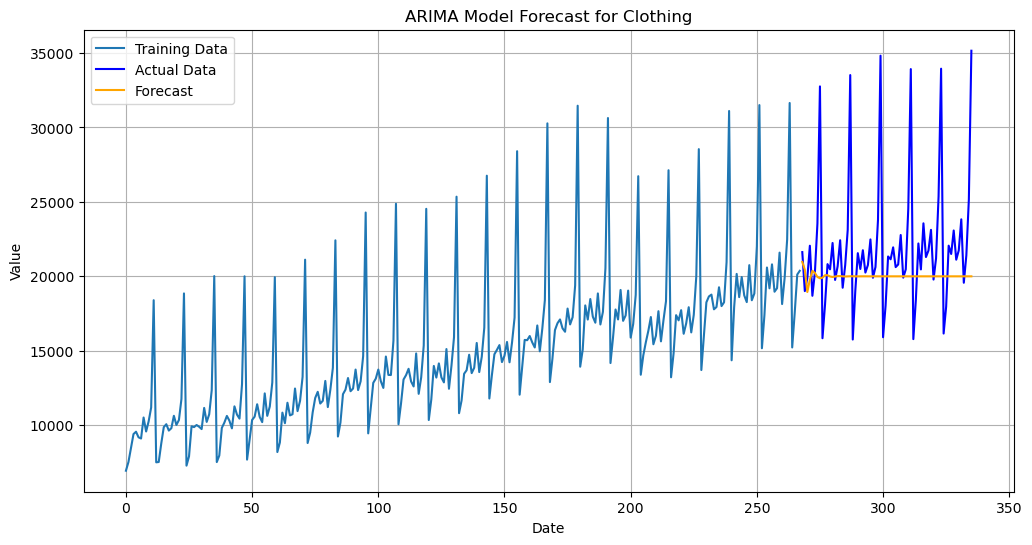

In [19]:
# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title(f"ARIMA Model Forecast for {target_column}")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()
